# Rotácia

Vektorovým súčin operátora $\nabla$ s vektorovým poľom $\mathbf{F}(x,y,z)$ dostaneme vektorové pole, ktoré popisuje mieru vírovosti vektorového poľa, t.j. do akej miery sa v danom bode priestoru sa pole zakrivuje alebo uzatvára do slučiek. V prípade, že pole vytvára oblúk alebo slučku, vektor rotácie v danom bode je nenulový a kolmý na oblúk alebo slučku poľa, jeho kladná alebo záporná orientácia hovorí o smere zakrivenia (lavotočivá, pravotočivá)  

\begin{equation}
curl \, \mathbf{F} = \nabla \times \mathbf{F} = 
\begin{vmatrix} \mathbf{i} & \mathbf{j} & \mathbf{k} \\
{\dfrac{\partial}{\partial x}} & {\dfrac{\partial}{\partial y}} & {\dfrac{\partial}{\partial z}} \\
F_x & F_y & F_z \end{vmatrix} =
\left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}\right) \mathbf{i} + \left(\frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \mathbf{j} + \left(\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \mathbf{k} 
\end{equation}

### Diskrétna aproximácia rotácie

Rotácia v $(x,y)$ rovine má len zložku v smere osi z. 

<!--
<img src="./img/rot_2d_01.png" width=450 >
-->

\begin{figure}
\centerline{\includegraphics[width=8cm]{./img/rot_2d_01.png}}
\caption{\label{fig:example}Rotácia v x-y rovine}
\end{figure}

\begin{equation*}
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \approx
\frac{F_y(x +\frac{\Delta x}{2}, y) - F_y(x -\frac{\Delta x}{2}, y) }{\Delta x} -
\frac{F_x(x, y +\frac{\Delta y}{2} ) - F_x(x, y -\frac{\Delta y}{2}) }{\Delta y} 
\end{equation*}

Pre $\Delta x = \Delta y = \delta$ môžeme vzťah upraviť

\begin{equation}
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \approx
\frac{1}{\delta} \big(
F_y(x +\frac{\delta}{2}, y) - F_y(x -\frac{\delta}{2}, y) - F_x(x, y +\frac{\delta}{2} ) - F_x(x, y -\frac{\delta}{2}) \big)
\end{equation}

### Symbolický výpočet

Pomocou symbolických manipulácií *sympy* určime rotáciu vektorového poľa v 2D rovine

\begin{equation*}
\mathbf{F}(x,y) =  \hat{i} \, \left( -y \, (1-x-y)+ \frac{x}{4} \right)  +  \hat{j} \, \left(2 -x^2 + \frac{y}{4} \right) 
\end{equation*}

In [1]:
%reset -f 
from utils.utils import *
from sympy.vector import CoordSys3D, curl
r = CoordSys3D('R')
F = (-r.y*(1 - r.x - r.y**2) + r.x/4)*r.i + (2 - r.x**2 + r.y/4)*r.j
C = curl(F)

ltxprint(r'\nabla \times \mathbf{F}', C)

'$\\nabla \\times \\mathbf{F}=(- 3 \\mathbf{{x}_{R}} - 3 \\mathbf{{y}_{R}}^{2} + 1)\\mathbf{\\hat{k}_{R}}$'

### Vizualizácia

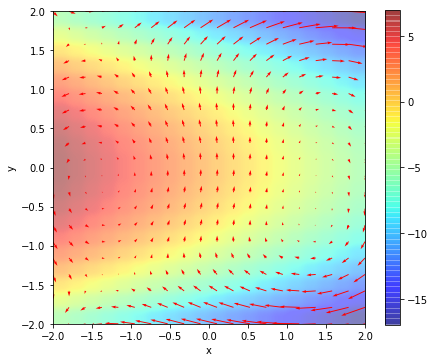

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Fx = F.components[r.i].subs([(r.x, 'x'), (r.y, 'y')])                 
Fy = F.components[r.j].subs([(r.x, 'x'), (r.y, 'y')]) 
Cs = C.subs([(r.x, 'x'), (r.y, 'y'), (r.k, 1)]) 

dx = np.linspace(-2.0, 2.0, 20)      # rozsahy suradnic   
dy = np.linspace(-2.0, 2.0, 20) 
x,y = np.meshgrid(dx, dy)  

c = eval(str(Cs))
fx = eval(str(Fx))
fy = eval(str(Fy))

fig = plt.figure(figsize=(7, 5.8))
ax = fig.add_subplot(111)
ax.quiver(x, y, fx, fy, color='r')
img = ax.imshow(c, extent=[-2, 2, -2, 2], origin='lower', interpolation='kaiser', 
                 clip_on=True, alpha=0.5, cmap='jet') 
fig.colorbar(img)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 